# Conjectures

In [2]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_maps import *
from quantum_tools import *
from experiments import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

## Conjecture

In [21]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
n = 3
d = 2**n

model_list = []

for i in tqdm(range(5)):
    kraus = KrausMap(d = d, 
                     rank = d**2)

    model = ModelQuantumMap(
                            q_map = kraus,
                            loss = Conj2(index=1),
                            optimizer = tf.optimizers.Adam(learning_rate=0.005),
                           )

    model.train(inputs = [],
                targets = [],
                num_iter = 50000,
                N = 1,
                use_batch=False,
                verbose=False,
               )
    
    model_list.append(model)

pickle.dump(model_list, open("../../data/conjecture2.p", "wb"))

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

0.00032522542937840626 0


  0%|          | 0/50000 [00:00<?, ?it/s]

0.00040369656678507226 0


  0%|          | 0/50000 [00:00<?, ?it/s]

0.0004142484715501382 0


  0%|          | 0/50000 [00:00<?, ?it/s]

0.000520516344039379 0


  0%|          | 0/50000 [00:00<?, ?it/s]

0.0005129092053053341 0


AttributeError: Can't pickle local object 'make_gradient_clipnorm_fn.<locals>.<lambda>'

In [3]:
loss_list = []

for model in model_list:
    loss_list.append(model.loss_train)
pickle.dump(loss_list, open("../../data/conjecture2.p", "wb"))

NameError: name 'model_list' is not defined

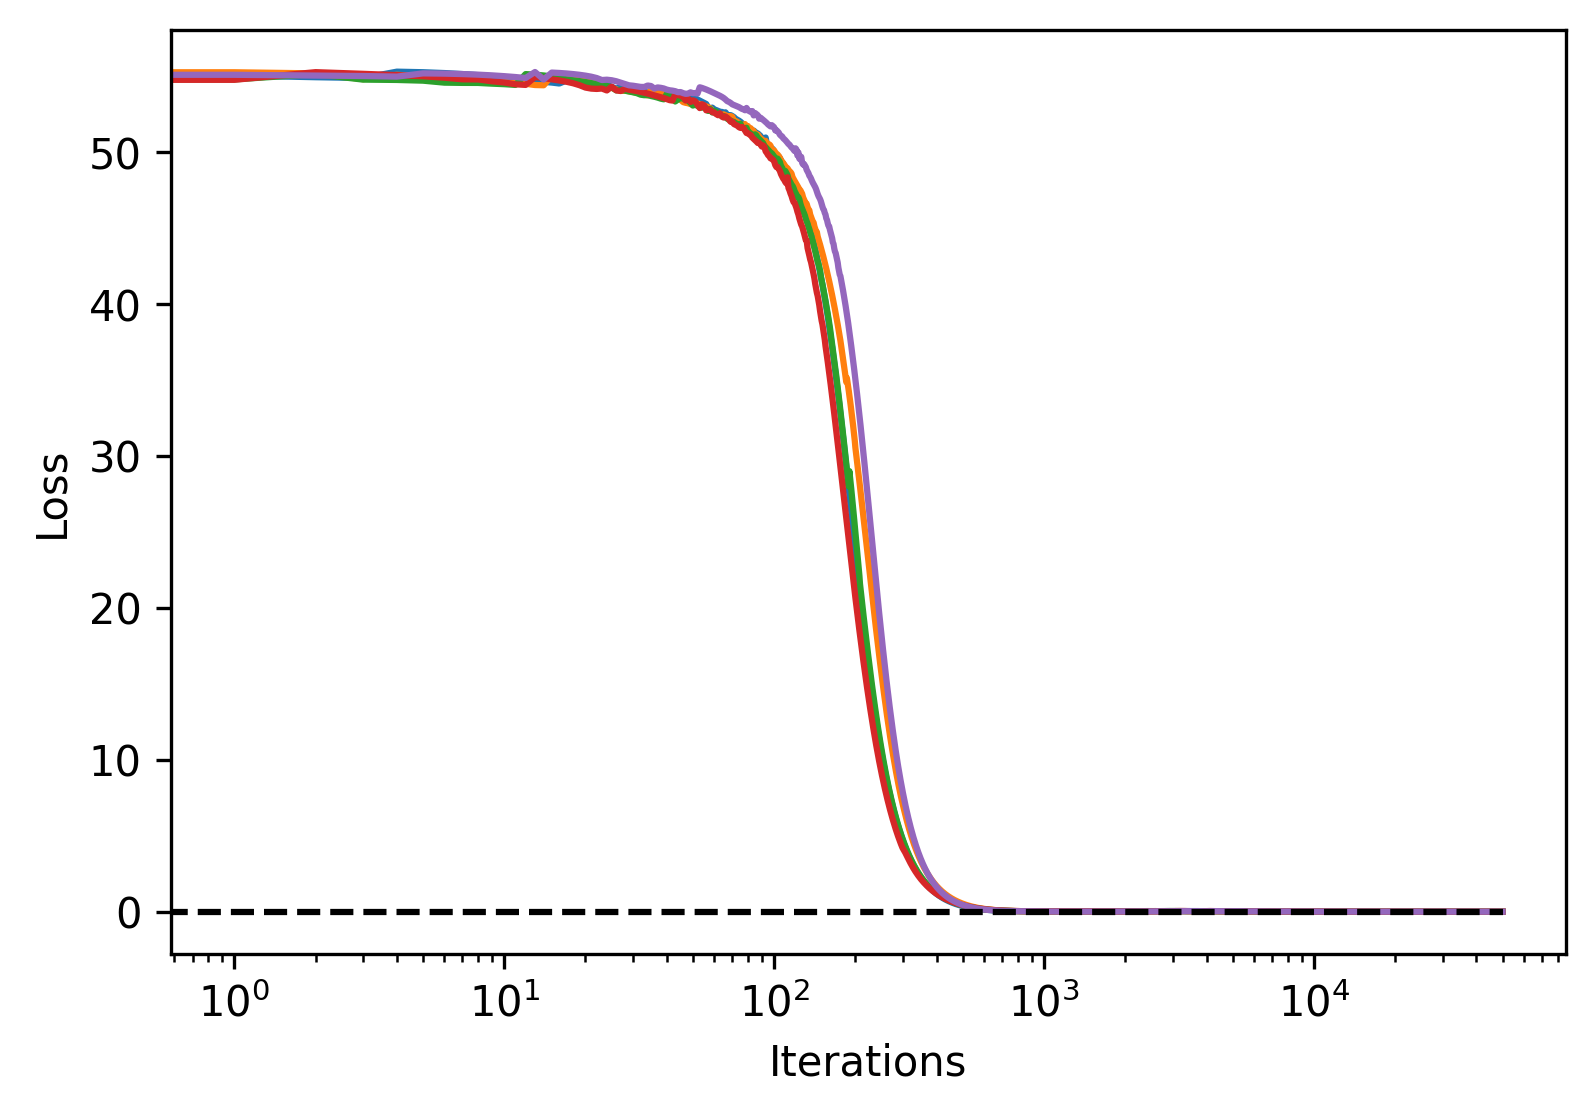

In [17]:
fig=plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

loss_list = pickle.load(open("../../data/conjecture2.p", "rb"))

for loss in loss_list:
    plt.plot(loss)
plt.plot([0, 50000], [0,0], "k--")
plt.xscale("log")
#plt.ylim([-1, 1])
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

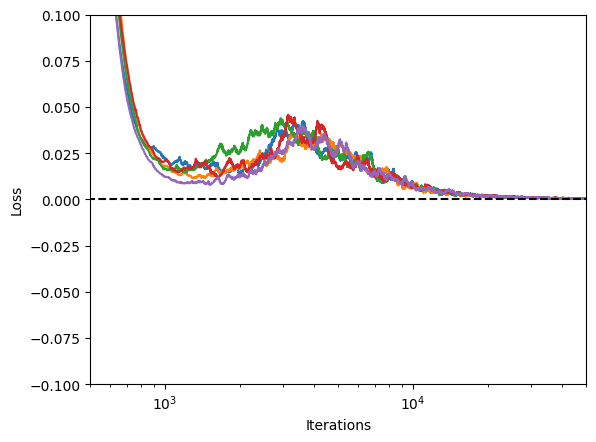

In [18]:
for loss in loss_list:
    plt.plot(loss)
plt.plot([0, 50000], [0,0], "k--")
plt.xscale("log")
plt.ylim([-0.1, 0.1])
plt.xlim([500, 50000])
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [ ]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
n = 4
d = 2**n

model_list = []

for i in tqdm(range(1)):
    kraus = KrausMap(d = d, 
                     rank = d**2)

    model = ModelQuantumMap(
                            q_map = kraus,
                            loss = Conj2(index=1),
                            optimizer = tf.optimizers.Adam(learning_rate=0.005),
                           )

    model.train(inputs = [],
                targets = [],
                num_iter = 50000,
                N = 1,
                use_batch=False,
                verbose=True,
               )
    
    loss = model.loss_train

pickle.dump(model_list, open("../../data/conjecture2_4qubits.p", "wb"))

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50000 [00:00<?, ?it/s]

Step:0, train: 239.04726+0.00000j, val: 0.00000
Step:1, train: 239.10135+0.00000j, val: 0.00000
Step:2, train: 238.93025+0.00000j, val: 0.00000
Step:3, train: 238.86474+0.00000j, val: 0.00000
Step:4, train: 238.76345+0.00000j, val: 0.00000
Step:5, train: 238.73235+0.00000j, val: 0.00000
Step:6, train: 239.10882+0.00000j, val: 0.00000
Step:7, train: 238.92753+0.00000j, val: 0.00000
Step:8, train: 238.80667+0.00000j, val: 0.00000
Step:9, train: 238.62455+0.00000j, val: 0.00000
Step:10, train: 238.74279+0.00000j, val: 0.00000
Step:11, train: 238.66195+0.00000j, val: 0.00000
Step:12, train: 238.83967+0.00000j, val: 0.00000
Step:13, train: 238.71186+0.00000j, val: 0.00000
Step:14, train: 238.60700+0.00000j, val: 0.00000
Step:15, train: 238.48501+0.00000j, val: 0.00000
Step:16, train: 238.35071+0.00000j, val: 0.00000
Step:17, train: 238.64618+0.00000j, val: 0.00000
Step:18, train: 238.55307+0.00000j, val: 0.00000
Step:19, train: 238.46080+0.00000j, val: 0.00000
Step:20, train: 238.35838+0.00

Step:167, train: 195.68248+0.00000j, val: 0.00000
Step:168, train: 194.49657+0.00000j, val: 0.00000
Step:169, train: 193.29780+0.00000j, val: 0.00000
Step:170, train: 192.05372+0.00000j, val: 0.00000
Step:171, train: 190.76952+0.00000j, val: 0.00000
Step:172, train: 189.44337+0.00000j, val: 0.00000
Step:173, train: 188.07263+0.00000j, val: 0.00000
Step:174, train: 186.65219+0.00000j, val: 0.00000
Step:175, train: 185.62697+0.00000j, val: 0.00000
Step:176, train: 184.16463+0.00000j, val: 0.00000
Step:177, train: 182.63764+0.00000j, val: 0.00000
Step:178, train: 181.04297+0.00000j, val: 0.00000
Step:179, train: 179.35613+0.00000j, val: 0.00000
Step:180, train: 177.60793+0.00000j, val: 0.00000
Step:181, train: 175.91649+0.00000j, val: 0.00000
Step:182, train: 174.22256+0.00000j, val: 0.00000
Step:183, train: 172.50080+0.00000j, val: 0.00000
Step:184, train: 170.74724+0.00000j, val: 0.00000
Step:185, train: 168.93117+0.00000j, val: 0.00000
Step:186, train: 167.05936+0.00000j, val: 0.00000


Step:334, train: 13.59601+0.00000j, val: 0.00000
Step:335, train: 13.39309+0.00000j, val: 0.00000
Step:336, train: 13.19383+0.00000j, val: 0.00000
Step:337, train: 12.99793+0.00000j, val: 0.00000
Step:338, train: 12.80553+0.00000j, val: 0.00000
Step:339, train: 12.61663+0.00000j, val: 0.00000
Step:340, train: 12.43122+0.00000j, val: 0.00000
Step:341, train: 12.24920+0.00000j, val: 0.00000
Step:342, train: 12.06993+0.00000j, val: 0.00000
Step:343, train: 11.89348+0.00000j, val: 0.00000
Step:344, train: 11.72056+0.00000j, val: 0.00000
Step:345, train: 11.55093+0.00000j, val: 0.00000
Step:346, train: 11.38465+0.00000j, val: 0.00000
Step:347, train: 11.22117+0.00000j, val: 0.00000
Step:348, train: 11.06031+0.00000j, val: 0.00000
Step:349, train: 10.90191+0.00000j, val: 0.00000
Step:350, train: 10.74625+0.00000j, val: 0.00000
Step:351, train: 10.59352+0.00000j, val: 0.00000
Step:352, train: 10.44344+0.00000j, val: 0.00000
Step:353, train: 10.29604+0.00000j, val: 0.00000
Step:354, train: 10.

Step:505, train: 1.79550+0.00000j, val: 0.00000
Step:506, train: 1.77725+0.00000j, val: 0.00000
Step:507, train: 1.75933+0.00000j, val: 0.00000
Step:508, train: 1.74177+0.00000j, val: 0.00000
Step:509, train: 1.72463+0.00000j, val: 0.00000
Step:510, train: 1.70753+0.00000j, val: 0.00000
Step:511, train: 1.69100+0.00000j, val: 0.00000
Step:512, train: 1.67449+0.00000j, val: 0.00000
Step:513, train: 1.65826+0.00000j, val: 0.00000
Step:514, train: 1.64211+0.00000j, val: 0.00000
Step:515, train: 1.62562+0.00000j, val: 0.00000
Step:516, train: 1.60993+0.00000j, val: 0.00000
Step:517, train: 1.59466+0.00000j, val: 0.00000
Step:518, train: 1.57930+0.00000j, val: 0.00000
Step:519, train: 1.56377+0.00000j, val: 0.00000
Step:520, train: 1.54862+0.00000j, val: 0.00000
Step:521, train: 1.53379+0.00000j, val: 0.00000
Step:522, train: 1.51881+0.00000j, val: 0.00000
Step:523, train: 1.50391+0.00000j, val: 0.00000
Step:524, train: 1.48902+0.00000j, val: 0.00000
Step:525, train: 1.47490+0.00000j, val: 

Step:676, train: 0.41478+0.00000j, val: 0.00000
Step:677, train: 0.41160+0.00000j, val: 0.00000
Step:678, train: 0.40870+0.00000j, val: 0.00000
Step:679, train: 0.40550+0.00000j, val: 0.00000
Step:680, train: 0.40266+0.00000j, val: 0.00000
Step:681, train: 0.39932+0.00000j, val: 0.00000
Step:682, train: 0.39593+0.00000j, val: 0.00000
Step:683, train: 0.39224+0.00000j, val: 0.00000
Step:684, train: 0.38916+0.00000j, val: 0.00000
Step:685, train: 0.38625+0.00000j, val: 0.00000
Step:686, train: 0.38333+0.00000j, val: 0.00000
Step:687, train: 0.38038+0.00000j, val: 0.00000
Step:688, train: 0.37766+0.00000j, val: 0.00000
Step:689, train: 0.37474+0.00000j, val: 0.00000
Step:690, train: 0.37157+0.00000j, val: 0.00000
Step:691, train: 0.36838+0.00000j, val: 0.00000
Step:692, train: 0.36543+0.00000j, val: 0.00000
Step:693, train: 0.36241+0.00000j, val: 0.00000
Step:694, train: 0.35984+0.00000j, val: 0.00000
Step:695, train: 0.35729+0.00000j, val: 0.00000
Step:696, train: 0.35460+0.00000j, val: 

Step:847, train: 0.12297+0.00000j, val: 0.00000
Step:848, train: 0.12227+0.00000j, val: 0.00000
Step:849, train: 0.12139+0.00000j, val: 0.00000
Step:850, train: 0.12077+0.00000j, val: 0.00000
Step:851, train: 0.12033+0.00000j, val: 0.00000
Step:852, train: 0.11982+0.00000j, val: 0.00000
Step:853, train: 0.11935+0.00000j, val: 0.00000
Step:854, train: 0.11882+0.00000j, val: 0.00000
Step:855, train: 0.11829+0.00000j, val: 0.00000
Step:856, train: 0.11756+0.00000j, val: 0.00000
Step:857, train: 0.11670+0.00000j, val: 0.00000
Step:858, train: 0.11640+0.00000j, val: 0.00000
Step:859, train: 0.11595+0.00000j, val: 0.00000
Step:860, train: 0.11516+0.00000j, val: 0.00000
Step:861, train: 0.11429+0.00000j, val: 0.00000
Step:862, train: 0.11368+0.00000j, val: 0.00000
Step:863, train: 0.11314+0.00000j, val: 0.00000
Step:864, train: 0.11281+0.00000j, val: 0.00000
Step:865, train: 0.11222+0.00000j, val: 0.00000
Step:866, train: 0.11157+0.00000j, val: 0.00000
Step:867, train: 0.11067+0.00000j, val: 

Step:1018, train: 0.07164+0.00000j, val: 0.00000
Step:1019, train: 0.07162+0.00000j, val: 0.00000
Step:1020, train: 0.07128+0.00000j, val: 0.00000
Step:1021, train: 0.07091+0.00000j, val: 0.00000
Step:1022, train: 0.07056+0.00000j, val: 0.00000
Step:1023, train: 0.07038+0.00000j, val: 0.00000
Step:1024, train: 0.07066+0.00000j, val: 0.00000
Step:1025, train: 0.07070+0.00000j, val: 0.00000
Step:1026, train: 0.07032+0.00000j, val: 0.00000
Step:1027, train: 0.06970+0.00000j, val: 0.00000
Step:1028, train: 0.06935+0.00000j, val: 0.00000
Step:1029, train: 0.06930+0.00000j, val: 0.00000
Step:1030, train: 0.06947+0.00000j, val: 0.00000
Step:1031, train: 0.06929+0.00000j, val: 0.00000
Step:1032, train: 0.06908+0.00000j, val: 0.00000
Step:1033, train: 0.06893+0.00000j, val: 0.00000
Step:1034, train: 0.06905+0.00000j, val: 0.00000
Step:1035, train: 0.06903+0.00000j, val: 0.00000
Step:1036, train: 0.06905+0.00000j, val: 0.00000
Step:1037, train: 0.06864+0.00000j, val: 0.00000
Step:1038, train: 0.

Step:1186, train: 0.06990+0.00000j, val: 0.00000
Step:1187, train: 0.06974+0.00000j, val: 0.00000
Step:1188, train: 0.06984+0.00000j, val: 0.00000
Step:1189, train: 0.06954+0.00000j, val: 0.00000
Step:1190, train: 0.06921+0.00000j, val: 0.00000
Step:1191, train: 0.06944+0.00000j, val: 0.00000
Step:1192, train: 0.06983+0.00000j, val: 0.00000
Step:1193, train: 0.07035+0.00000j, val: 0.00000
Step:1194, train: 0.07078+0.00000j, val: 0.00000
Step:1195, train: 0.07056+0.00000j, val: 0.00000
Step:1196, train: 0.07007+0.00000j, val: 0.00000
Step:1197, train: 0.06966+0.00000j, val: 0.00000
Step:1198, train: 0.06997+0.00000j, val: 0.00000
Step:1199, train: 0.07061+0.00000j, val: 0.00000
Step:1200, train: 0.07090+0.00000j, val: 0.00000
Step:1201, train: 0.07063+0.00000j, val: 0.00000
Step:1202, train: 0.07079+0.00000j, val: 0.00000
Step:1203, train: 0.07073+0.00000j, val: 0.00000
Step:1204, train: 0.07110+0.00000j, val: 0.00000
Step:1205, train: 0.07127+0.00000j, val: 0.00000
Step:1206, train: 0.

Step:1354, train: 0.07472+0.00000j, val: 0.00000
Step:1355, train: 0.07471+0.00000j, val: 0.00000
Step:1356, train: 0.07488+0.00000j, val: 0.00000
Step:1357, train: 0.07550+0.00000j, val: 0.00000
Step:1358, train: 0.07603+0.00000j, val: 0.00000
Step:1359, train: 0.07560+0.00000j, val: 0.00000
Step:1360, train: 0.07481+0.00000j, val: 0.00000
Step:1361, train: 0.07446+0.00000j, val: 0.00000
Step:1362, train: 0.07482+0.00000j, val: 0.00000
Step:1363, train: 0.07565+0.00000j, val: 0.00000
Step:1364, train: 0.07603+0.00000j, val: 0.00000
Step:1365, train: 0.07587+0.00000j, val: 0.00000
Step:1366, train: 0.07542+0.00000j, val: 0.00000
Step:1367, train: 0.07493+0.00000j, val: 0.00000
Step:1368, train: 0.07512+0.00000j, val: 0.00000
Step:1369, train: 0.07485+0.00000j, val: 0.00000
Step:1370, train: 0.07491+0.00000j, val: 0.00000
Step:1371, train: 0.07533+0.00000j, val: 0.00000
Step:1372, train: 0.07585+0.00000j, val: 0.00000
Step:1373, train: 0.07571+0.00000j, val: 0.00000
Step:1374, train: 0.

Step:1522, train: 0.08811+0.00000j, val: 0.00000
Step:1523, train: 0.08820+0.00000j, val: 0.00000
Step:1524, train: 0.08863+0.00000j, val: 0.00000
Step:1525, train: 0.08882+0.00000j, val: 0.00000
Step:1526, train: 0.08836+0.00000j, val: 0.00000
Step:1527, train: 0.08794+0.00000j, val: 0.00000
Step:1528, train: 0.08792+0.00000j, val: 0.00000
Step:1529, train: 0.08813+0.00000j, val: 0.00000
Step:1530, train: 0.08827+0.00000j, val: 0.00000
Step:1531, train: 0.08825+0.00000j, val: 0.00000
Step:1532, train: 0.08819+0.00000j, val: 0.00000
Step:1533, train: 0.08817+0.00000j, val: 0.00000
Step:1534, train: 0.08830+0.00000j, val: 0.00000
Step:1535, train: 0.08822+0.00000j, val: 0.00000
Step:1536, train: 0.08768+0.00000j, val: 0.00000
Step:1537, train: 0.08782+0.00000j, val: 0.00000
Step:1538, train: 0.08784+0.00000j, val: 0.00000
Step:1539, train: 0.08781+0.00000j, val: 0.00000
Step:1540, train: 0.08796+0.00000j, val: 0.00000
Step:1541, train: 0.08775+0.00000j, val: 0.00000
Step:1542, train: 0.

Step:1690, train: 0.09579+0.00000j, val: 0.00000
Step:1691, train: 0.09648+0.00000j, val: 0.00000
Step:1692, train: 0.09729+0.00000j, val: 0.00000
Step:1693, train: 0.09772+0.00000j, val: 0.00000
Step:1694, train: 0.09788+0.00000j, val: 0.00000
Step:1695, train: 0.09759+0.00000j, val: 0.00000
Step:1696, train: 0.09679+0.00000j, val: 0.00000
Step:1697, train: 0.09649+0.00000j, val: 0.00000
Step:1698, train: 0.09703+0.00000j, val: 0.00000
Step:1699, train: 0.09745+0.00000j, val: 0.00000
Step:1700, train: 0.09807+0.00000j, val: 0.00000
Step:1701, train: 0.09852+0.00000j, val: 0.00000
Step:1702, train: 0.09876+0.00000j, val: 0.00000
Step:1703, train: 0.09847+0.00000j, val: 0.00000
Step:1704, train: 0.09811+0.00000j, val: 0.00000
Step:1705, train: 0.09814+0.00000j, val: 0.00000
Step:1706, train: 0.09829+0.00000j, val: 0.00000
Step:1707, train: 0.09861+0.00000j, val: 0.00000
Step:1708, train: 0.09880+0.00000j, val: 0.00000
Step:1709, train: 0.09902+0.00000j, val: 0.00000
Step:1710, train: 0.

Step:1858, train: 0.10804+0.00000j, val: 0.00000
Step:1859, train: 0.10794+0.00000j, val: 0.00000
Step:1860, train: 0.10815+0.00000j, val: 0.00000
Step:1861, train: 0.10819+0.00000j, val: 0.00000
Step:1862, train: 0.10863+0.00000j, val: 0.00000
Step:1863, train: 0.10916+0.00000j, val: 0.00000
Step:1864, train: 0.10996+0.00000j, val: 0.00000
Step:1865, train: 0.10987+0.00000j, val: 0.00000
Step:1866, train: 0.10900+0.00000j, val: 0.00000
Step:1867, train: 0.10798+0.00000j, val: 0.00000
Step:1868, train: 0.10739+0.00000j, val: 0.00000
Step:1869, train: 0.10749+0.00000j, val: 0.00000
Step:1870, train: 0.10790+0.00000j, val: 0.00000
Step:1871, train: 0.10815+0.00000j, val: 0.00000
Step:1872, train: 0.10895+0.00000j, val: 0.00000
Step:1873, train: 0.11004+0.00000j, val: 0.00000
Step:1874, train: 0.10982+0.00000j, val: 0.00000
Step:1875, train: 0.10964+0.00000j, val: 0.00000
Step:1876, train: 0.10947+0.00000j, val: 0.00000
Step:1877, train: 0.10950+0.00000j, val: 0.00000
Step:1878, train: 0.

Step:2026, train: 0.12823+0.00000j, val: 0.00000
Step:2027, train: 0.12775+0.00000j, val: 0.00000
Step:2028, train: 0.12757+0.00000j, val: 0.00000
Step:2029, train: 0.12799+0.00000j, val: 0.00000
Step:2030, train: 0.12827+0.00000j, val: 0.00000
Step:2031, train: 0.12858+0.00000j, val: 0.00000
Step:2032, train: 0.12938+0.00000j, val: 0.00000
Step:2033, train: 0.13025+0.00000j, val: 0.00000
Step:2034, train: 0.13010+0.00000j, val: 0.00000
Step:2035, train: 0.13017+0.00000j, val: 0.00000
Step:2036, train: 0.12992+0.00000j, val: 0.00000
Step:2037, train: 0.13017+0.00000j, val: 0.00000
Step:2038, train: 0.13025+0.00000j, val: 0.00000
Step:2039, train: 0.13093+0.00000j, val: 0.00000
Step:2040, train: 0.13125+0.00000j, val: 0.00000
Step:2041, train: 0.13147+0.00000j, val: 0.00000
Step:2042, train: 0.13221+0.00000j, val: 0.00000
Step:2043, train: 0.13254+0.00000j, val: 0.00000
Step:2044, train: 0.13251+0.00000j, val: 0.00000
Step:2045, train: 0.13228+0.00000j, val: 0.00000
Step:2046, train: 0.

Step:2194, train: 0.14953+0.00000j, val: 0.00000
Step:2195, train: 0.14879+0.00000j, val: 0.00000
Step:2196, train: 0.14910+0.00000j, val: 0.00000
Step:2197, train: 0.14980+0.00000j, val: 0.00000
Step:2198, train: 0.15068+0.00000j, val: 0.00000
Step:2199, train: 0.15144+0.00000j, val: 0.00000
Step:2200, train: 0.15196+0.00000j, val: 0.00000
Step:2201, train: 0.15113+0.00000j, val: 0.00000
Step:2202, train: 0.15022+0.00000j, val: 0.00000
Step:2203, train: 0.14910+0.00000j, val: 0.00000
Step:2204, train: 0.14897+0.00000j, val: 0.00000
Step:2205, train: 0.14924+0.00000j, val: 0.00000
Step:2206, train: 0.14973+0.00000j, val: 0.00000
Step:2207, train: 0.15029+0.00000j, val: 0.00000
Step:2208, train: 0.15025+0.00000j, val: 0.00000
Step:2209, train: 0.15054+0.00000j, val: 0.00000
Step:2210, train: 0.15102+0.00000j, val: 0.00000
Step:2211, train: 0.15154+0.00000j, val: 0.00000
Step:2212, train: 0.15129+0.00000j, val: 0.00000
Step:2213, train: 0.15087+0.00000j, val: 0.00000
Step:2214, train: 0.

Step:2362, train: 0.17720+0.00000j, val: 0.00000
Step:2363, train: 0.17724+0.00000j, val: 0.00000
Step:2364, train: 0.17740+0.00000j, val: 0.00000
Step:2365, train: 0.17779+0.00000j, val: 0.00000
Step:2366, train: 0.17849+0.00000j, val: 0.00000
Step:2367, train: 0.17973+0.00000j, val: 0.00000
Step:2368, train: 0.18057+0.00000j, val: 0.00000
Step:2369, train: 0.18096+0.00000j, val: 0.00000
Step:2370, train: 0.18082+0.00000j, val: 0.00000
Step:2371, train: 0.18098+0.00000j, val: 0.00000
Step:2372, train: 0.18098+0.00000j, val: 0.00000
Step:2373, train: 0.18173+0.00000j, val: 0.00000
Step:2374, train: 0.18278+0.00000j, val: 0.00000
Step:2375, train: 0.18342+0.00000j, val: 0.00000
Step:2376, train: 0.18431+0.00000j, val: 0.00000
Step:2377, train: 0.18470+0.00000j, val: 0.00000
Step:2378, train: 0.18543+0.00000j, val: 0.00000
Step:2379, train: 0.18607+0.00000j, val: 0.00000
Step:2380, train: 0.18692+0.00000j, val: 0.00000
Step:2381, train: 0.18745+0.00000j, val: 0.00000
Step:2382, train: 0.

Step:2530, train: 0.22972+0.00000j, val: 0.00000
Step:2531, train: 0.22851+0.00000j, val: 0.00000
Step:2532, train: 0.22736+0.00000j, val: 0.00000
Step:2533, train: 0.22700+0.00000j, val: 0.00000
Step:2534, train: 0.22758+0.00000j, val: 0.00000
Step:2535, train: 0.22753+0.00000j, val: 0.00000
Step:2536, train: 0.22736+0.00000j, val: 0.00000
Step:2537, train: 0.22808+0.00000j, val: 0.00000
Step:2538, train: 0.22855+0.00000j, val: 0.00000
Step:2539, train: 0.22946+0.00000j, val: 0.00000
Step:2540, train: 0.22984+0.00000j, val: 0.00000
Step:2541, train: 0.23025+0.00000j, val: 0.00000
Step:2542, train: 0.23072+0.00000j, val: 0.00000
Step:2543, train: 0.23091+0.00000j, val: 0.00000
Step:2544, train: 0.23021+0.00000j, val: 0.00000
Step:2545, train: 0.22850+0.00000j, val: 0.00000
Step:2546, train: 0.22771+0.00000j, val: 0.00000
Step:2547, train: 0.22795+0.00000j, val: 0.00000
Step:2548, train: 0.22860+0.00000j, val: 0.00000
Step:2549, train: 0.22959+0.00000j, val: 0.00000
Step:2550, train: 0.